# TensorFlow & Keras - Basics of Deep Learning

### Most importantly... resources

https://www.tensorflow.org/api_docs

https://keras.io/

https://www.tensorflow.org/tutorials/

https://www.google.com

## TF overview

* #### "End-to-end machine learning platform" 

    - Not the only one! Check out PyTorch, Theano, Cognitive Toolkit.
   
* #### Integrates with high-level APIs like Keras
* #### Plays nice with Pandas
* #### Makes deep learning *fast* and *easy* *
    *<sup>"easy"</sup>

## Tasks for TensorFlow:

* #### Regression
    - Predict house prices
    - Predict drug metabolic rates
    - Predict stock trends *
    
    *<sup>this is super hard</sup>
    
    

* #### Classification
    - Cat or dog?
    - Malignant or benign cancer from images
    ![](media/dr.png)
    <span style="font-size:0.75em;">Google AI Blog: Diabetic Retinopathy</span>



* #### Dimensionality reduction
    - Visualize high-dimensional data in 2 or 3-D space
    - Compress representations for successive ML



* #### Generative models
    - Create new molecules with desirable properties
    - Artificially enhance image resolution
    ![](media/molecular_gan.png)
    <span style="font-size:0.75em;">Kadurin et al., 2017</span>


* #### Reinforcement learning
    - Can't beat your friends at chess? Make your computer do it



* #### Much more...
    - Generic math
    - Probabilistic programming with TFP
    - Automatic differentiation
    - ...


## Let's Regress

### Imports!

In [1]:
import numpy as np
import pandas as pd

Name a more iconic duo, I'll wait

#### New imports -- TF and Keras

In [2]:
import keras
import tensorflow as tf

Using TensorFlow backend.


Check our versions for good measure -- these programs may have very different behavior version-to-version

In [3]:
print(keras.__version__)
print(tf.__version__)

2.1.5
1.12.0


#### Loading in housing data as with SKLearn

In [5]:
data = pd.read_csv('kc_house_data.csv')
data.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [6]:
column_selection = ["bedrooms","bathrooms","sqft_living","sqft_lot",
                    "floors","condition","grade","sqft_above",
                    "sqft_basement","sqft_living15","sqft_lot15",
                    "lat", "long","yr_built","yr_renovated","waterfront"]

selected_feature = np.array(data[column_selection])
price = np.array(data["price"])
selected_feature_train = selected_feature[:20000]
price_train = price[:20000]

selected_feature_test = selected_feature[20000:]
price_test = price[20000:]

In [7]:
def score(y,y_pred):
    return np.mean(np.abs(y-y_pred)/y)

In [44]:
model=keras.Sequential()
input_len=len(column_selection)
model.add(keras.layers.Dense(50,input_dim=input_len,activation='sigmoid'))
# 50 nodes in this layer, relu: rectified linear activation func
model.add(keras.layers.Dense(50,activation='sigmoid'))
model.add(keras.layers.Dense(1))

model.compile(loss='mean_squared_error',optimizer='adam')

In [34]:
history = model.fit(selected_feature_train, price_train,
                        epochs=50, batch_size=128)

Epoch 1/50
18000/18000 [==============================] - 0s 12us/step - loss: 52485753230.6773
Epoch 2/50
18000/18000 [==============================] - 0s 10us/step - loss: 52648117410.9298
Epoch 3/50
18000/18000 [==============================] - 0s 11us/step - loss: 52478529718.0444
Epoch 4/50
18000/18000 [==============================] - 0s 11us/step - loss: 52422246876.9564
Epoch 5/50
18000/18000 [==============================] - 0s 10us/step - loss: 52347538256.3271
Epoch 6/50
18000/18000 [==============================] - 0s 11us/step - loss: 52198436064.8249
Epoch 7/50
18000/18000 [==============================] - 0s 11us/step - loss: 52306575567.5307
Epoch 8/50
18000/18000 [==============================] - 0s 10us/step - loss: 52115878306.7022
Epoch 9/50
18000/18000 [==============================] - 0s 11us/step - loss: 52222353076.6791
Epoch 10/50
18000/18000 [==============================] - 0s 10us/step - loss: 52053176640.3982
Epoch 11/50
18000/18000 [==============

In [46]:
preds=model.predict(selected_feature_test)
score(preds,price_test)

2063.3376366324014

### Like SKLearn, it's easy to train and evaluate simple models.
#### ... but we should try to do better

## Practical Deep Learning -- What you need to know
### Train, Validation, Test:
   * Optimize parameters with Train (weights, biases)
   * Optimize hyperparameters with Validation (layer width & depth, activation functions, etc.)
   * Optimize NOTHING with Test

In [33]:
# Split out a validation set for hyperparameter optimization
selected_feature_train = selected_feature[:18000]
price_train = price[:18000]

selected_feature_val=selected_feature[18000:20000]
price_val=price[18000:20000]

selected_feature_test = selected_feature[20000:]
price_test = price[20000:]


#### In the future, try better validation schemes like [k-fold cross validation](https://chrisalbon.com/deep_learning/keras/k-fold_cross-validating_neural_networks/), though 80/20 or 90/10 train/val like this works in a pinch

### Try a hyperparameter optimization:

### Try three activation functions to use for dense layers in the neural network above. Save the model that achieves the best validation loss 

#### Hint: [activation functions](http://letmegooglethat.com/?q=keras+activation+functions)

#### Hint: `model.fit` has argument "`validation_data`" which takes a tuple of features and targets

#### Hint: Use `model.save("filename.h5")` to save a model locally. If you want to use it later, just call `keras.models.load_model("filename.h5")`

In [45]:
history = model.fit(selected_feature_train, price_train,
                        epochs=50, batch_size=128,validation_data=(selected_feature_val,price_val))

Train on 18000 samples, validate on 2000 samples
Epoch 1/50
18000/18000 [==============================] - 1s 31us/step - loss: 416669915123.2569 - val_loss: 456354571485.1840
Epoch 2/50
18000/18000 [==============================] - 0s 13us/step - loss: 416661760959.3742 - val_loss: 456346804158.4640
Epoch 3/50
18000/18000 [==============================] - 0s 12us/step - loss: 416654797890.4462 - val_loss: 456339877265.4080
Epoch 4/50
18000/18000 [==============================] - 0s 12us/step - loss: 416648190754.8160 - val_loss: 456332967149.5680
Epoch 5/50
18000/18000 [==============================] - 0s 12us/step - loss: 416641701205.3334 - val_loss: 456326070927.3600
Epoch 6/50
18000/18000 [==============================] - 0s 13us/step - loss: 416635099778.6169 - val_loss: 456319290572.8000
Epoch 7/50
18000/18000 [==============================] - 0s 12us/step - loss: 416628735417.4578 - val_loss: 456312695554.0480
Epoch 8/50
18000/18000 [==============================] - 0s 1

### Visualize your training:



### Standardize your features:
* Typically assumes normally distributed feature, shifting mean to 0 and standard deviation to 1
* In theory does not matter for neural networks
* In practice tends to matter for neural networks
* Scale if using:
    - Logistic regression
    - Support vector machines
    - Perceptrons
    - Neural networks
    - Principle component analysis
* Don't bother if using:
    - "Forest" methods
    - Naive Bayes

In [ ]:
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler
in_scaler = StandardScaler()


Train on 18000 samples, validate on 2000 samples
Epoch 1/200
18000/18000 [==============================] - 1s 69us/step - loss: 416644724774.2293 - val_loss: 456240251273.2160
Epoch 2/200
18000/18000 [==============================] - 0s 14us/step - loss: 416219411047.3102 - val_loss: 455230525276.1600
Epoch 3/200
18000/18000 [==============================] - 0s 16us/step - loss: 414539373463.3245 - val_loss: 452292457267.2000
Epoch 4/200
18000/18000 [==============================] - 0s 14us/step - loss: 410731792826.3680 - val_loss: 446517339226.1120
Epoch 5/200
18000/18000 [==============================] - 0s 12us/step - loss: 403953550943.1182 - val_loss: 437057174896.6400
Epoch 6/200
18000/18000 [==============================] - 0s 11us/step - loss: 393657770544.6969 - val_loss: 423509280423.9360
Epoch 7/200
18000/18000 [==============================] - 0s 11us/step - loss: 379580761156.2667 - val_loss: 405581878001.6640
Epoch 8/200
18000/18000 [==============================

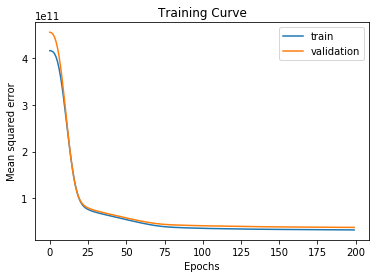

In [61]:
model = nn_model()

model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(selected_feature_train, price_train,
            epochs=100, batch_size=128,
            validation_data=(selected_feature_val, price_val))
model_score = score(model.predict(selected_feature_val), price_val)
print(model_score)

plot_loss(history)

#### In the future, consider standardizing outputs as well

### Regularize:
* Heavily parameterized models like neural networks are prone to overfitting
* Popular off-the-shelf tools exist to regularize models and prevent overfitting:
    - L2 regularization (weight decay)
    - Dropout
    - Batch normalization
    
#### These tools come as standard Keras/TF layers!
`model.add(keras.layers.Dropout(rate)`
`model.add(keras.layers.ActivityRegularization(l1=0.0, l2=0.0)`
`model.add(keras.layers.BatchNormalization())`

### Early stopping and model checkpointing:
#### It's unlikely the last iteration is the best, and who knows how long until the thing is converged. Just grab the best validation error.

In [ ]:
# Set callback functions to early stop training and save the 
# best model so far
from keras.callbacks import EarlyStopping, ModelCheckpoint


### You don't have to remember these resources because they're here when you need them
https://www.tensorflow.org/api_docs

https://keras.io/

https://www.tensorflow.org/tutorials/

https://www.google.com

### Don't trust me, trust your validation errors
### Don't look at your test set until you're actually going to test